<a href="https://colab.research.google.com/github/changsin/DeepLearning-101/blob/master/03_tf_train_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries.

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt


Define hyperparameters first.

In [2]:
NUM_OF_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
# input image dimensions
IMG_ROWS, IMG_COLS = 28, 28

Load the dataset. [MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a built-in dataset in TensorFlow.

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [14]:
data_format = K.image_data_format()
print(data_format)

channels_last


In [ ]:
if data_format == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    input_shape = (1, IMG_ROWS, IMG_COLS)
else:
    x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    input_shape = (IMG_ROWS, IMG_COLS, 1)

Define the model using Sequential.

In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_OF_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Specify the optimizer for backpropagation. Note that the loss (cost) funciton is cross entropy that tends to go hand-in-hand with softmax activation function.

In [5]:
optimizer = keras.optimizers.Adadelta() 
loss = keras.losses.categorical_crossentropy

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Ready for training finally. Let's roll.

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 142s 303ms/step - loss: 2.2876 - accuracy: 0.1482 - val_loss: 2.2608 - val_accuracy: 0.3184
Epoch 2/10
469/469 [==============================] - 142s 303ms/step - loss: 2.2455 - accuracy: 0.2467 - val_loss: 2.2091 - val_accuracy: 0.4601
Epoch 3/10
469/469 [==============================] - 141s 301ms/step - loss: 2.1903 - accuracy: 0.3422 - val_loss: 2.1371 - val_accuracy: 0.5685
Epoch 4/10
469/469 [==============================] - 146s 312ms/step - loss: 2.1133 - accuracy: 0.4258 - val_loss: 2.0383 - val_accuracy: 0.6348
Epoch 5/10
469/469 [==============================] - 141s 302ms/step - loss: 2.0093 - accuracy: 0.4940 - val_loss: 1.9056 - val_accuracy: 0.6875
Epoch 6/10
469/469 [==============================] - 143s 304ms/step - loss: 1.8723 - accuracy: 0.5512 - val_loss: 1.7322 - val_accuracy: 0.7319
Epoch 7/10
469/469 [==============================] - 142s 303ms/step - loss: 1.7026 - accuracy: 0.5969 - val_loss: 1.5233 -

Let's evaluate the model.

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.9484 - accuracy: 0.8272


[0.9484146237373352, 0.8271999955177307]

Predict means inferencing.

In [8]:
CLASS_NAMES = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(CLASS_NAMES)

preds = model.predict(x_test)

preds_single = CLASS_NAMES[np.argmax(preds, axis = -1)]
actual_single = CLASS_NAMES[np.argmax(y_test, axis = -1)]

[0 1 2 3 4 5 6 7 8 9]


Show the training loss and accuracy.

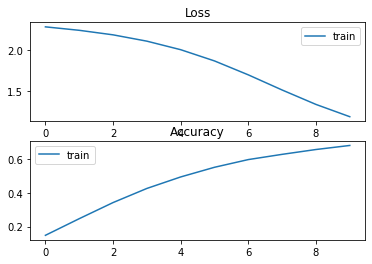

In [9]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# plot mse during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

Show the results in UI.

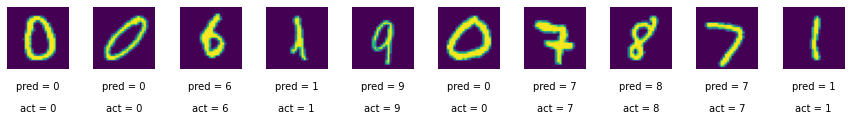

In [15]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)